<a href="https://colab.research.google.com/github/Fackor/Advanced_Machine_Learning_Course/blob/main/NeMo_zeroshot_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
BRANCH = 'zeroshot'
!python -m pip install git+https://github.com/purn3ndu/NeMo.git@$BRANCH#egg=nemo_toolkit[nlp]

  Cloning https://github.com/purn3ndu/NeMo.git (to revision zeroshot) to /tmp/pip-install-o33mynvz/nemo-toolkit
  Running command git clone -q https://github.com/purn3ndu/NeMo.git /tmp/pip-install-o33mynvz/nemo-toolkit
  Running command git checkout -b zeroshot --track origin/zeroshot
  Switched to a new branch 'zeroshot'
  Branch 'zeroshot' set up to track remote branch 'zeroshot' from 'origin'.
     |████████████████████████████████| 7.7MB 11.4MB/s 
     |████████████████████████████████| 409kB 46.8MB/s 
     |████████████████████████████████| 112kB 48.5MB/s 
     |████████████████████████████████| 122kB 52.0MB/s 
     |████████████████████████████████| 1.3MB 30.2MB/s 
     |████████████████████████████████| 133kB 52.1MB/s 
     |████████████████████████████████| 11.6MB 47.0MB/s 
     |████████████████████████████████| 1.1MB 49.6MB/s 
     |████████████████████████████████| 245kB 54.8MB/s 
     |████████████████████████████████| 1.7MB 47.2MB/s 
     |████████████████████████████████|

In [2]:
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

--2020-11-24 04:23:26--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  17.5MB/s    in 11s     

2020-11-24 04:23:37 (7.21 MB/s) - ‘aclImdb_v1.tar.gz’ saved [84125825/84125825]



In [3]:
!ls

aclImdb_v1.tar.gz  sample_data


In [5]:
!tar -xvf aclImdb_v1.tar.gz  

Streaming output truncated to the last 5000 lines.
aclImdb/train/unsup/44983_0.txt
aclImdb/train/unsup/44982_0.txt
aclImdb/train/unsup/44981_0.txt
aclImdb/train/unsup/44980_0.txt
aclImdb/train/unsup/44979_0.txt
aclImdb/train/unsup/44978_0.txt
aclImdb/train/unsup/44977_0.txt
aclImdb/train/unsup/44976_0.txt
aclImdb/train/unsup/44975_0.txt
aclImdb/train/unsup/44974_0.txt
aclImdb/train/unsup/44973_0.txt
aclImdb/train/unsup/44972_0.txt
aclImdb/train/unsup/44971_0.txt
aclImdb/train/unsup/44970_0.txt
aclImdb/train/unsup/44969_0.txt
aclImdb/train/unsup/44968_0.txt
aclImdb/train/unsup/44967_0.txt
aclImdb/train/unsup/44966_0.txt
aclImdb/train/unsup/44965_0.txt
aclImdb/train/unsup/44964_0.txt
aclImdb/train/unsup/44963_0.txt
aclImdb/train/unsup/44962_0.txt
aclImdb/train/unsup/44961_0.txt
aclImdb/train/unsup/44960_0.txt
aclImdb/train/unsup/44959_0.txt
aclImdb/train/unsup/44958_0.txt
aclImdb/train/unsup/44957_0.txt
aclImdb/train/unsup/44956_0.txt
aclImdb/train/unsup/44955_0.txt
aclImdb/train/unsup/4

In [25]:
import os

train_pos = []
for root, dirs, files in os.walk("aclImdb/train/pos/", topdown=False):
   for name in files:
      with open(os.path.join(root, name)) as f:
        for line in f:
          train_pos.append(line)
print(f"number of positive training examples = {len(train_pos)}")        

train_neg = []
for root, dirs, files in os.walk("aclImdb/train/neg/", topdown=False):
   for name in files:
      with open(os.path.join(root, name)) as f:
        for line in f:
          train_neg.append(line)
print(f"number of negative training examples = {len(train_neg)}")     

test_pos = []
for root, dirs, files in os.walk("aclImdb/test/pos/", topdown=False):
   for name in files:
      with open(os.path.join(root, name)) as f:
        for line in f:
          test_pos.append(line)
print(f"number of positive test examples = {len(test_pos)}")        

test_neg = []
for root, dirs, files in os.walk("aclImdb/test/neg/", topdown=False):
   for name in files:
      with open(os.path.join(root, name)) as f:
        for line in f:
          test_neg.append(line)
print(f"number of negative test examples = {len(test_neg)}")        


number of positive training examples = 12500
number of negative training examples = 12500
number of positive test examples = 12500
number of negative test examples = 12500


In [26]:
print("Train")
print(train_pos[:5])
print(train_neg[:5])

print("Test")
print(test_pos[:5])
print(test_neg[:5])

Train
["Jane Eyre has always been my favorite novel! When I stumbled upon this movie version in the late 90's I was ecstatic! This is the best and most complete version of the book on film! This version is a little long to sit through in one sitting but well worth it. Timothy Dalton is amazing as Rochester. I was glad that they cast a normal looking actress (Zelah Clark) as Jane and not a glamorous person. I love the sets and the location. For anyone who is a true Jane Eyre fan, this is the version to watch!!! For those of you who are interested, I just found this version on DVD. I have watched my VHS copy almost to breaking so I was thrilled to find it on DVD.", "An inventive, suspenseful exercise in claustrophobia. A Japanese thriller that sets itself a tough challenge by being entirely set in two rooms. Not completely successful, but taut, surprising and well-acted. One might find the film somewhat reminiscent of SAW \x96 two men trapped in room and pitting against each other \x96 b

In [27]:
POS = 0
NEG = 1

TRAIN_SET = []
TEST_SET = []

for each in train_pos:
  splits = each.split("<br /><br />")
  for review in splits:
    TRAIN_SET.append([review, POS])

for each in train_neg:
  splits = each.split("<br /><br />")
  for review in splits:
    TRAIN_SET.append([review, NEG])

print(len(TRAIN_SET))

for each in test_pos:
  splits = each.split("<br /><br />")
  for review in splits:
    TEST_SET.append([review, POS])

for each in test_neg:
  splits = each.split("<br /><br />")
  for review in splits:
    TEST_SET.append([review, NEG])

print(len(TEST_SET))

75935
75039


In [30]:
for each in TRAIN_SET[:1]:
  print(each)

["Jane Eyre has always been my favorite novel! When I stumbled upon this movie version in the late 90's I was ecstatic! This is the best and most complete version of the book on film! This version is a little long to sit through in one sitting but well worth it. Timothy Dalton is amazing as Rochester. I was glad that they cast a normal looking actress (Zelah Clark) as Jane and not a glamorous person. I love the sets and the location. For anyone who is a true Jane Eyre fan, this is the version to watch!!! For those of you who are interested, I just found this version on DVD. I have watched my VHS copy almost to breaking so I was thrilled to find it on DVD.", 0]


In [ ]:
from nemo.collections import nlp as nemo_nlp
from nemo.utils.exp_manager import exp_manager

import os
import wget 
import torch
import pytorch_lightning as pl
from omegaconf import OmegaConf

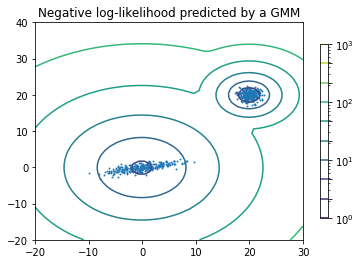

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sklearn import mixture

n_samples = 300

# generate random sample, two components
np.random.seed(0)

# generate spherical data centered on (20, 20)
shifted_gaussian = np.random.randn(n_samples, 2) + np.array([20, 20])

# generate zero centered stretched Gaussian data
C = np.array([[0., -0.7], [3.5, .7]])
stretched_gaussian = np.dot(np.random.randn(n_samples, 2), C)

# concatenate the two datasets into the final training set
X_train = np.vstack([shifted_gaussian, stretched_gaussian])

# fit a Gaussian Mixture Model with two components
clf = mixture.GaussianMixture(n_components=2, covariance_type='spherical')
clf.fit(X_train)

# display predicted scores by the model as a contour plot
x = np.linspace(-20., 30.)
y = np.linspace(-20., 40.)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)
Z = Z.reshape(X.shape)

CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                 levels=np.logspace(0, 3, 10))
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(X_train[:, 0], X_train[:, 1], .8)

plt.title('Negative log-likelihood predicted by a GMM')
plt.axis('tight')
plt.show()